In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import decomposition
from mpl_toolkits.mplot3d import axes3d
from datetime import datetime
import seaborn as sns

In [44]:
fueldata=pd.read_csv('PWR_UOX-MOX_BigDataFrame-SF-GSRC.csv')

In [3]:
for columna in ["Unnamed: 0","reactorType"]:
    fueldata= fueldata.loc[:, fueldata.columns != columna] 
describe=fueldata.describe()

In [4]:
describeT=describe.T

In [6]:
describeT.head(10)

,count,mean,std,min,25%,50%,75%,max
BU,1321397.0,3.750000e+01,1.890768e+01,5.000000e+00,2.100000e+01,3.750000e+01,5.400000e+01,7.000000e+01
CT,1321397.0,9.431489e+03,7.224655e+03,0.000000e+00,2.920000e+03,8.212500e+03,1.423500e+04,2.555000e+04
IE,1321397.0,5.058442e+00,2.209446e+00,1.500000e+00,3.400000e+00,4.800000e+00,6.200000e+00,1.000000e+01
TOT_SF,1321397.0,3.987430e+03,6.514934e+03,3.058430e-01,1.448870e+02,1.156270e+03,4.641330e+03,4.886950e+04
TOT_GSRC,1321397.0,1.138756e+11,9.852308e+11,5.537570e+08,8.029900e+09,1.416960e+10,2.614350e+10,1.412790e+13
TOT_A,1321397.0,1.910472e+11,9.398284e+11,2.203850e+09,3.413110e+10,6.663550e+10,1.307440e+11,1.316590e+13
TOT_H,1321397.0,2.137515e-02,8.807849e-02,2.020280e-04,4.144240e-03,9.029410e-03,1.621000e-02,1.194680e+00
H1,1321397.0,1.962059e-08,1.176918e-08,1.388937e-09,9.313198e-09,1.847087e-08,2.897212e-08,4.653881e-08
H2,1321397.0,2.329757e-09,1.407013e-09,1.527923e-10,1.101281e-09,2.191654e-09,3.430940e-09,5.663245e-09
H3,1321397.0,1.266704e-12,1.498539e-12,1.253470e-15,2.107893e-13,6.585329e-13,1.762956e-12,1.000650e-11


In [44]:
from sklearn import preprocessing
Encoder = preprocessing.LabelEncoder()
fueldata['fuelType']=Encoder.fit_transform(fueldata['fuelType']).reshape(-1,1)

In [ ]:
fig, ax = plt.subplots(14, 21, sharex='col', sharey='row',figsize=(121, 80))

m=0
for i in range(14):
    for j in range(21):
        fueldata.hist(column = fueldata.columns[m], bins = 12, ax=ax[i,j])
        m+=1
        if(len(fueldata.columns)<=m):
            m=0

plt.show()

In [ ]:
fig.savefig("histogramas.png")

In [ ]:
nulos=fueldata.isnull().sum()
for i in nulos:
    if i!=0:
        print(i)

In [ ]:
correlacional={'pearson', 'kendall', 'spearman'}
import seaborn as sns
list_corr=[]
print(datetime.now())
#for cor in correlacional:
#print(dataset.corr(method=cor))
cor ='pearson'
corr = fueldata.corr(method=cor) 
list_corr.append(corr)
f, ax = plt.subplots(figsize=(10, 8)) 
fig = sns.heatmap(list_corr[0], mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
f.savefig("pearson_preprocessing.png")
print(datetime.now())


In [ ]:
#for cor in correlacional:
#print(dataset.corr(method=cor))
print(datetime.now())
cor ='kendall'
corr = fueldata.corr(method=cor) 
list_corr.append(corr)
f, ax = plt.subplots(figsize=(10, 8)) 
fig = sns.heatmap(list_corr[1], mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
f.savefig("kendall_preprocessing.png")
print(datetime.now())

In [ ]:
#for cor in correlacional:
#print(dataset.corr(method=cor))
print(datetime.now())
cor ='spearman'
corr = fueldata.corr(method=cor) 
list_corr.append(corr)
f, ax = plt.subplots(figsize=(10, 8)) 


In [ ]:
for cor in range(0,len(list_corr)) :
    f, ax = plt.subplots(figsize=(10, 8)) 
    fig = sns.heatmap(list_corr[cor], mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
    f.savefig(str(correlacional[cor])+"_preprocessing.png")

In [ ]:
f.savefig("pearson_preprocessing.png")

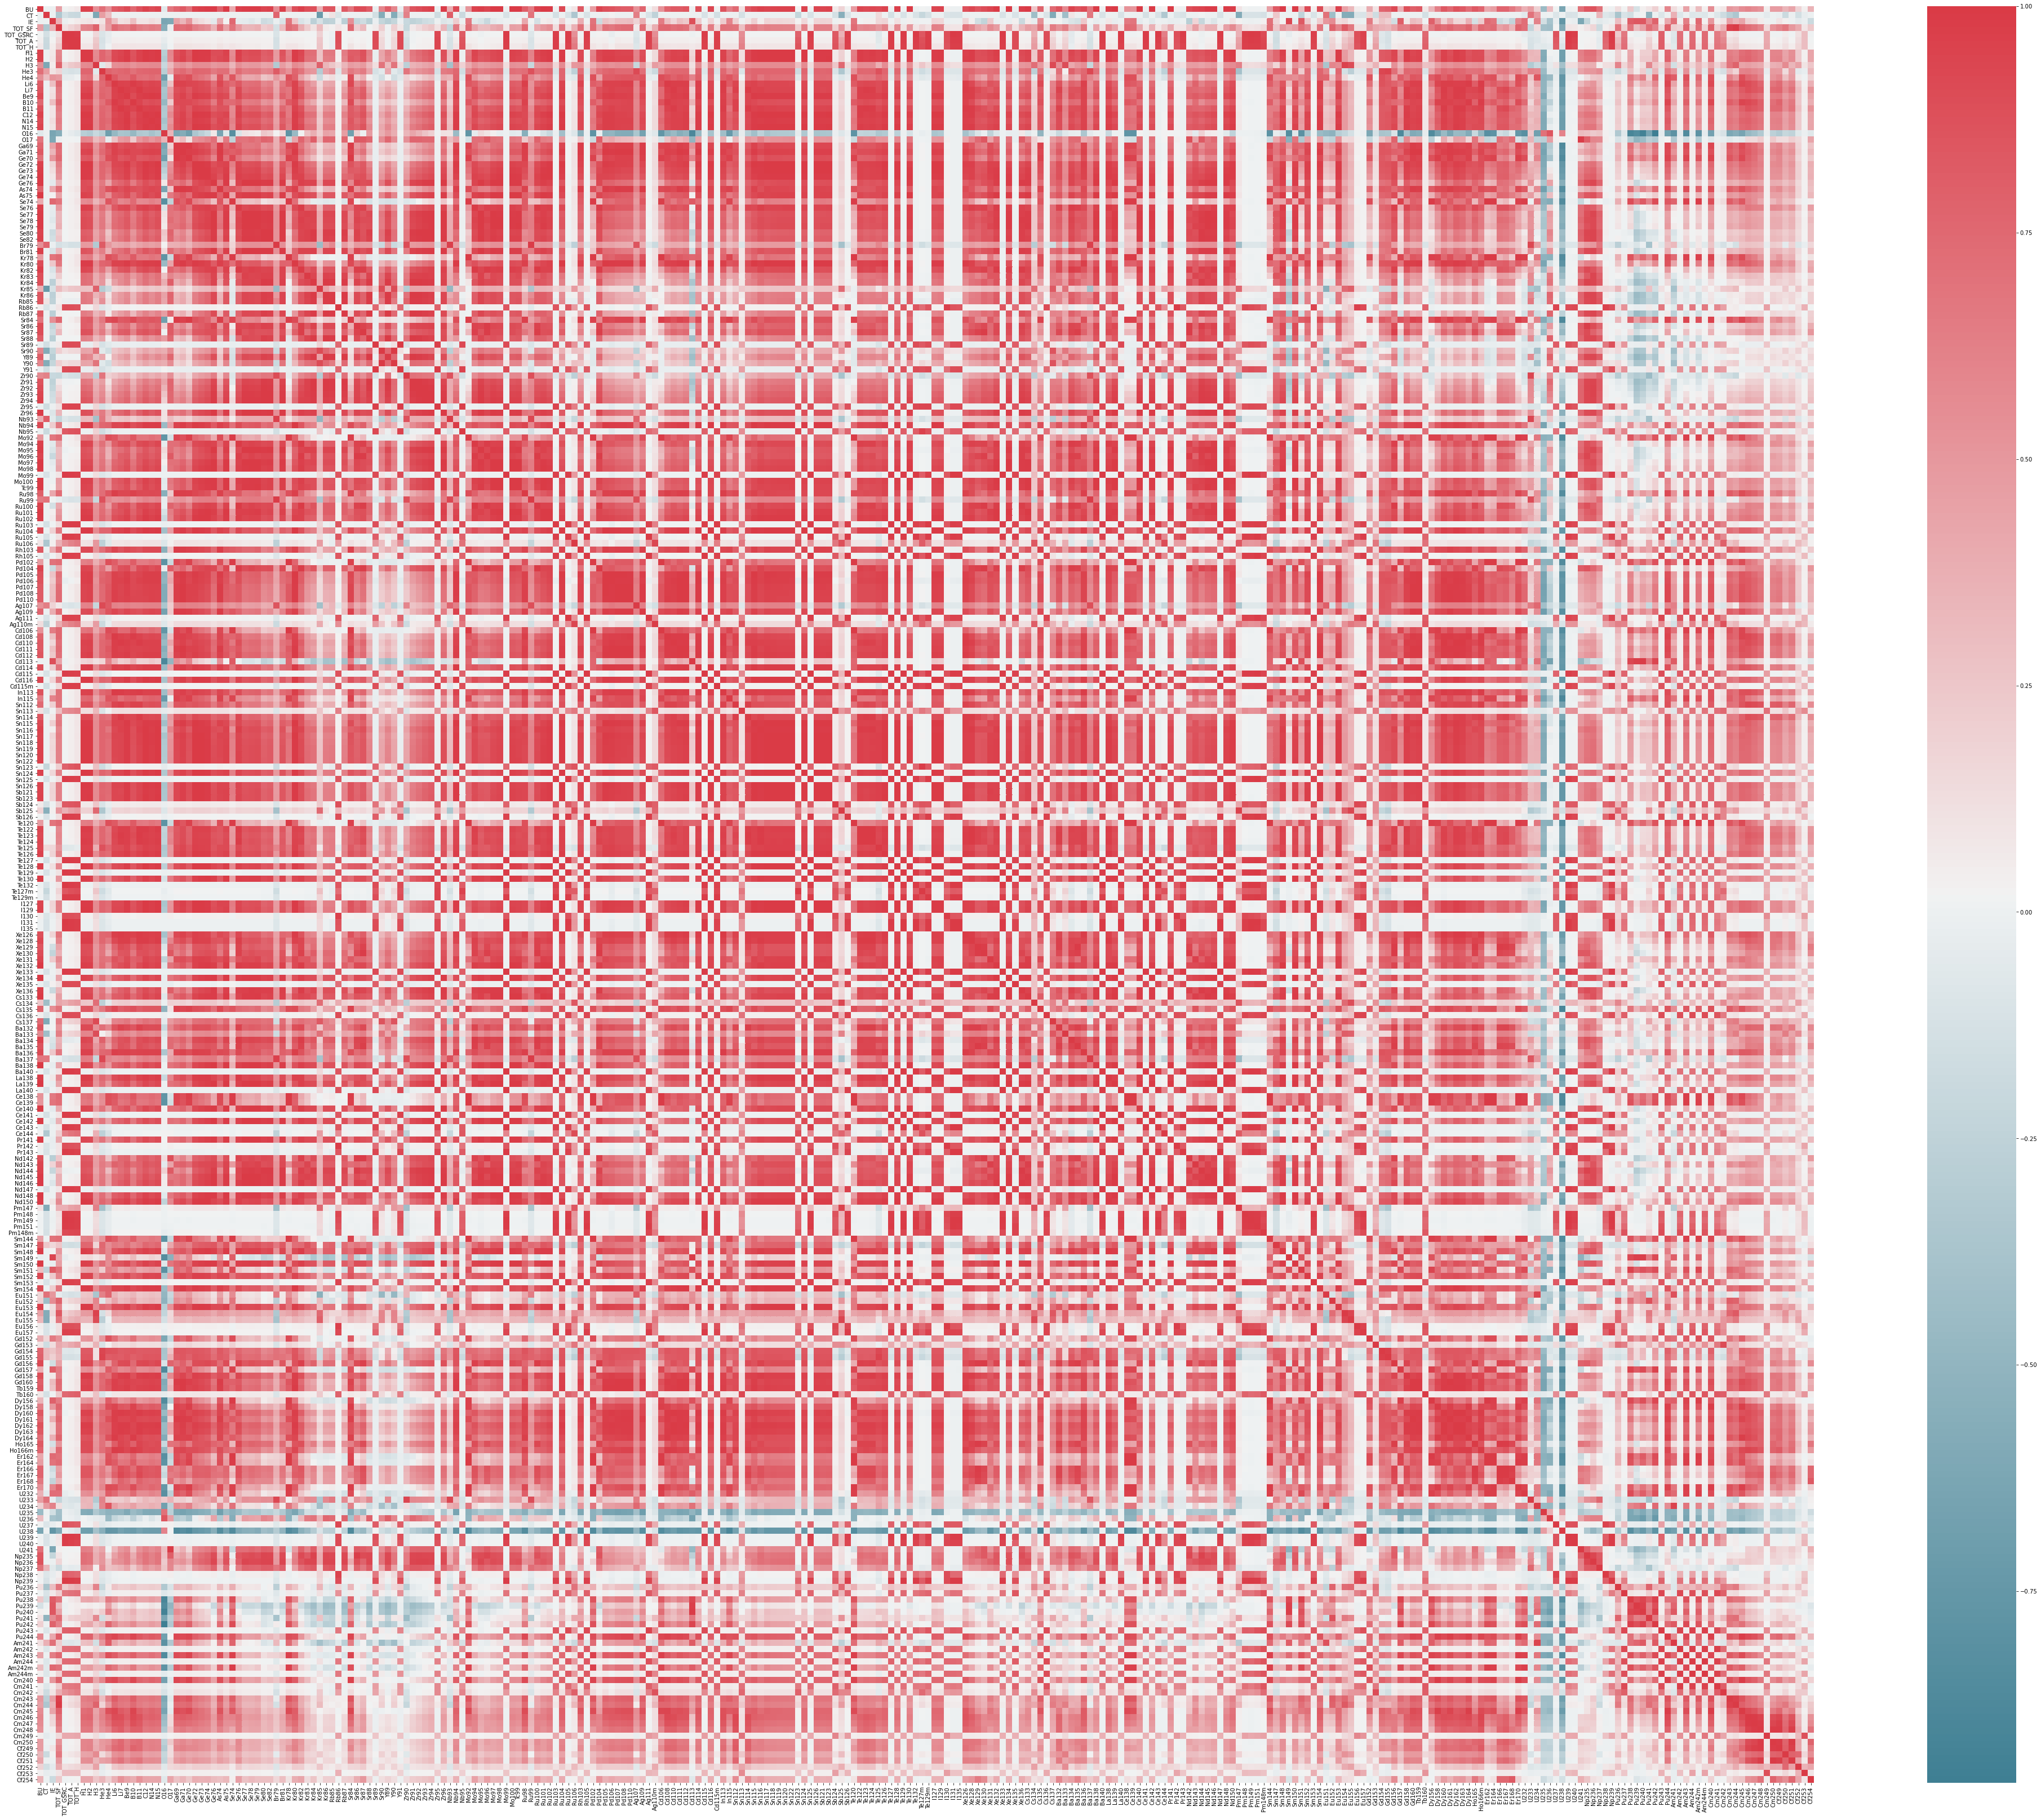

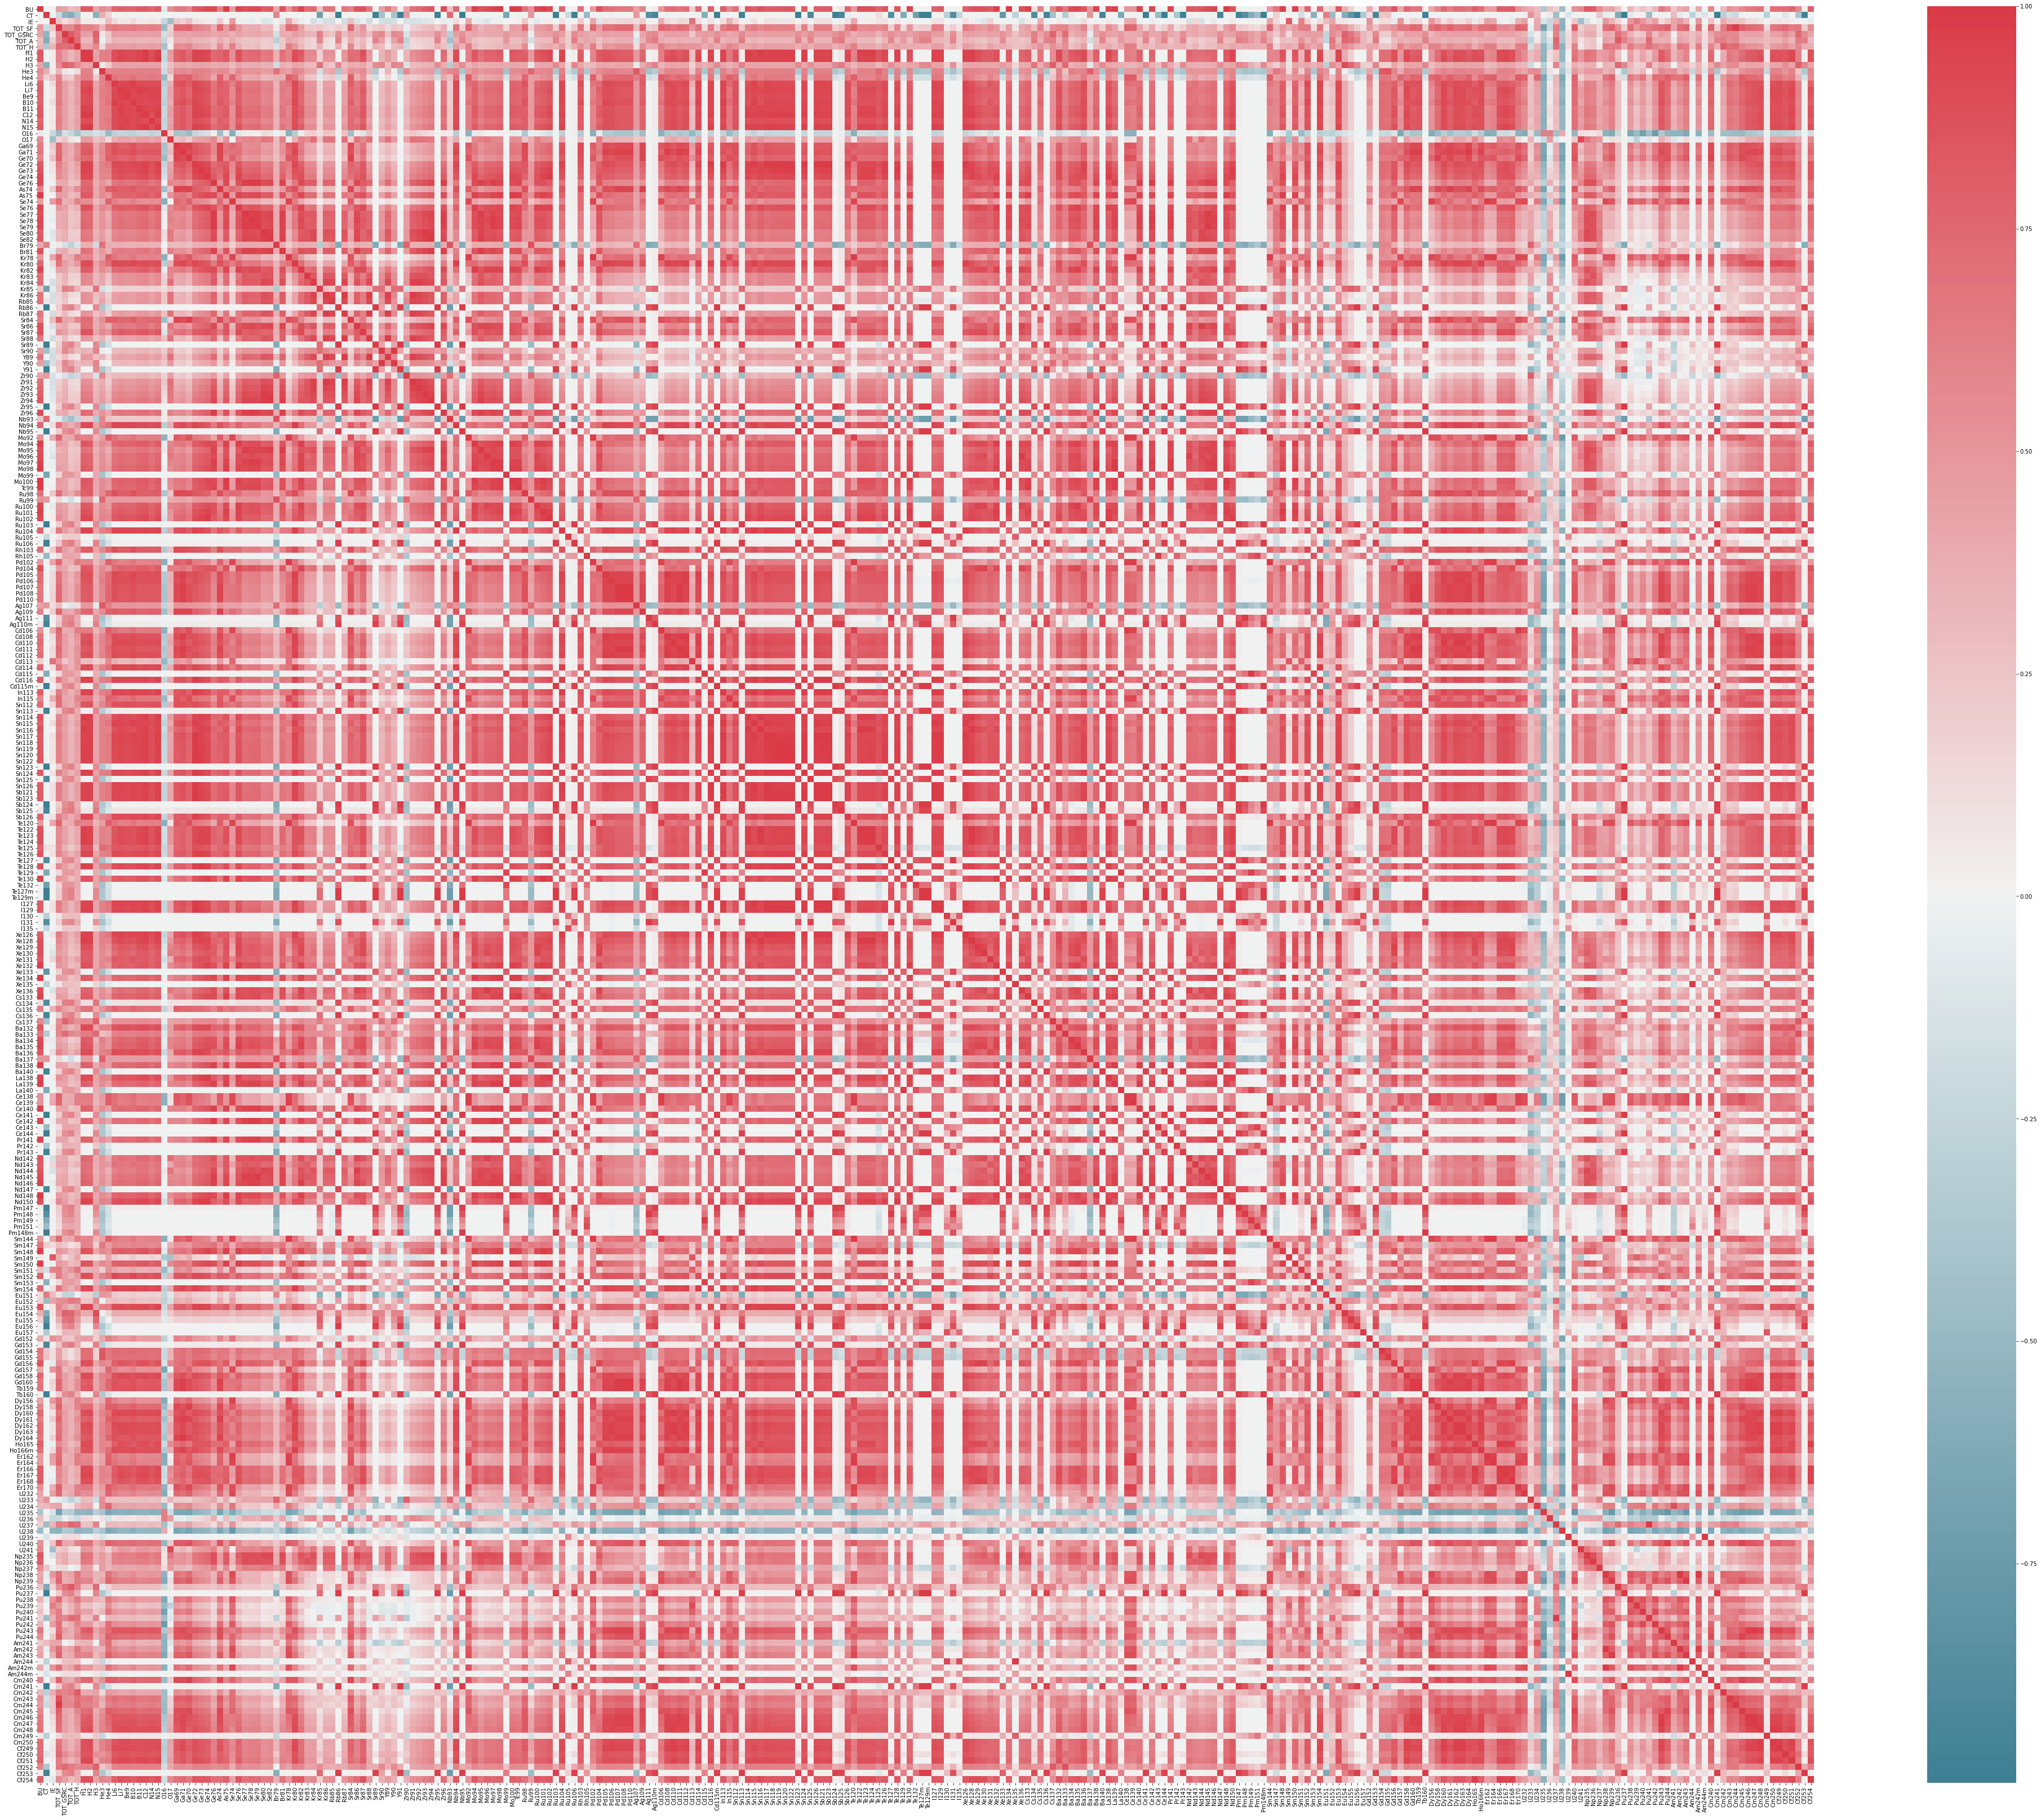

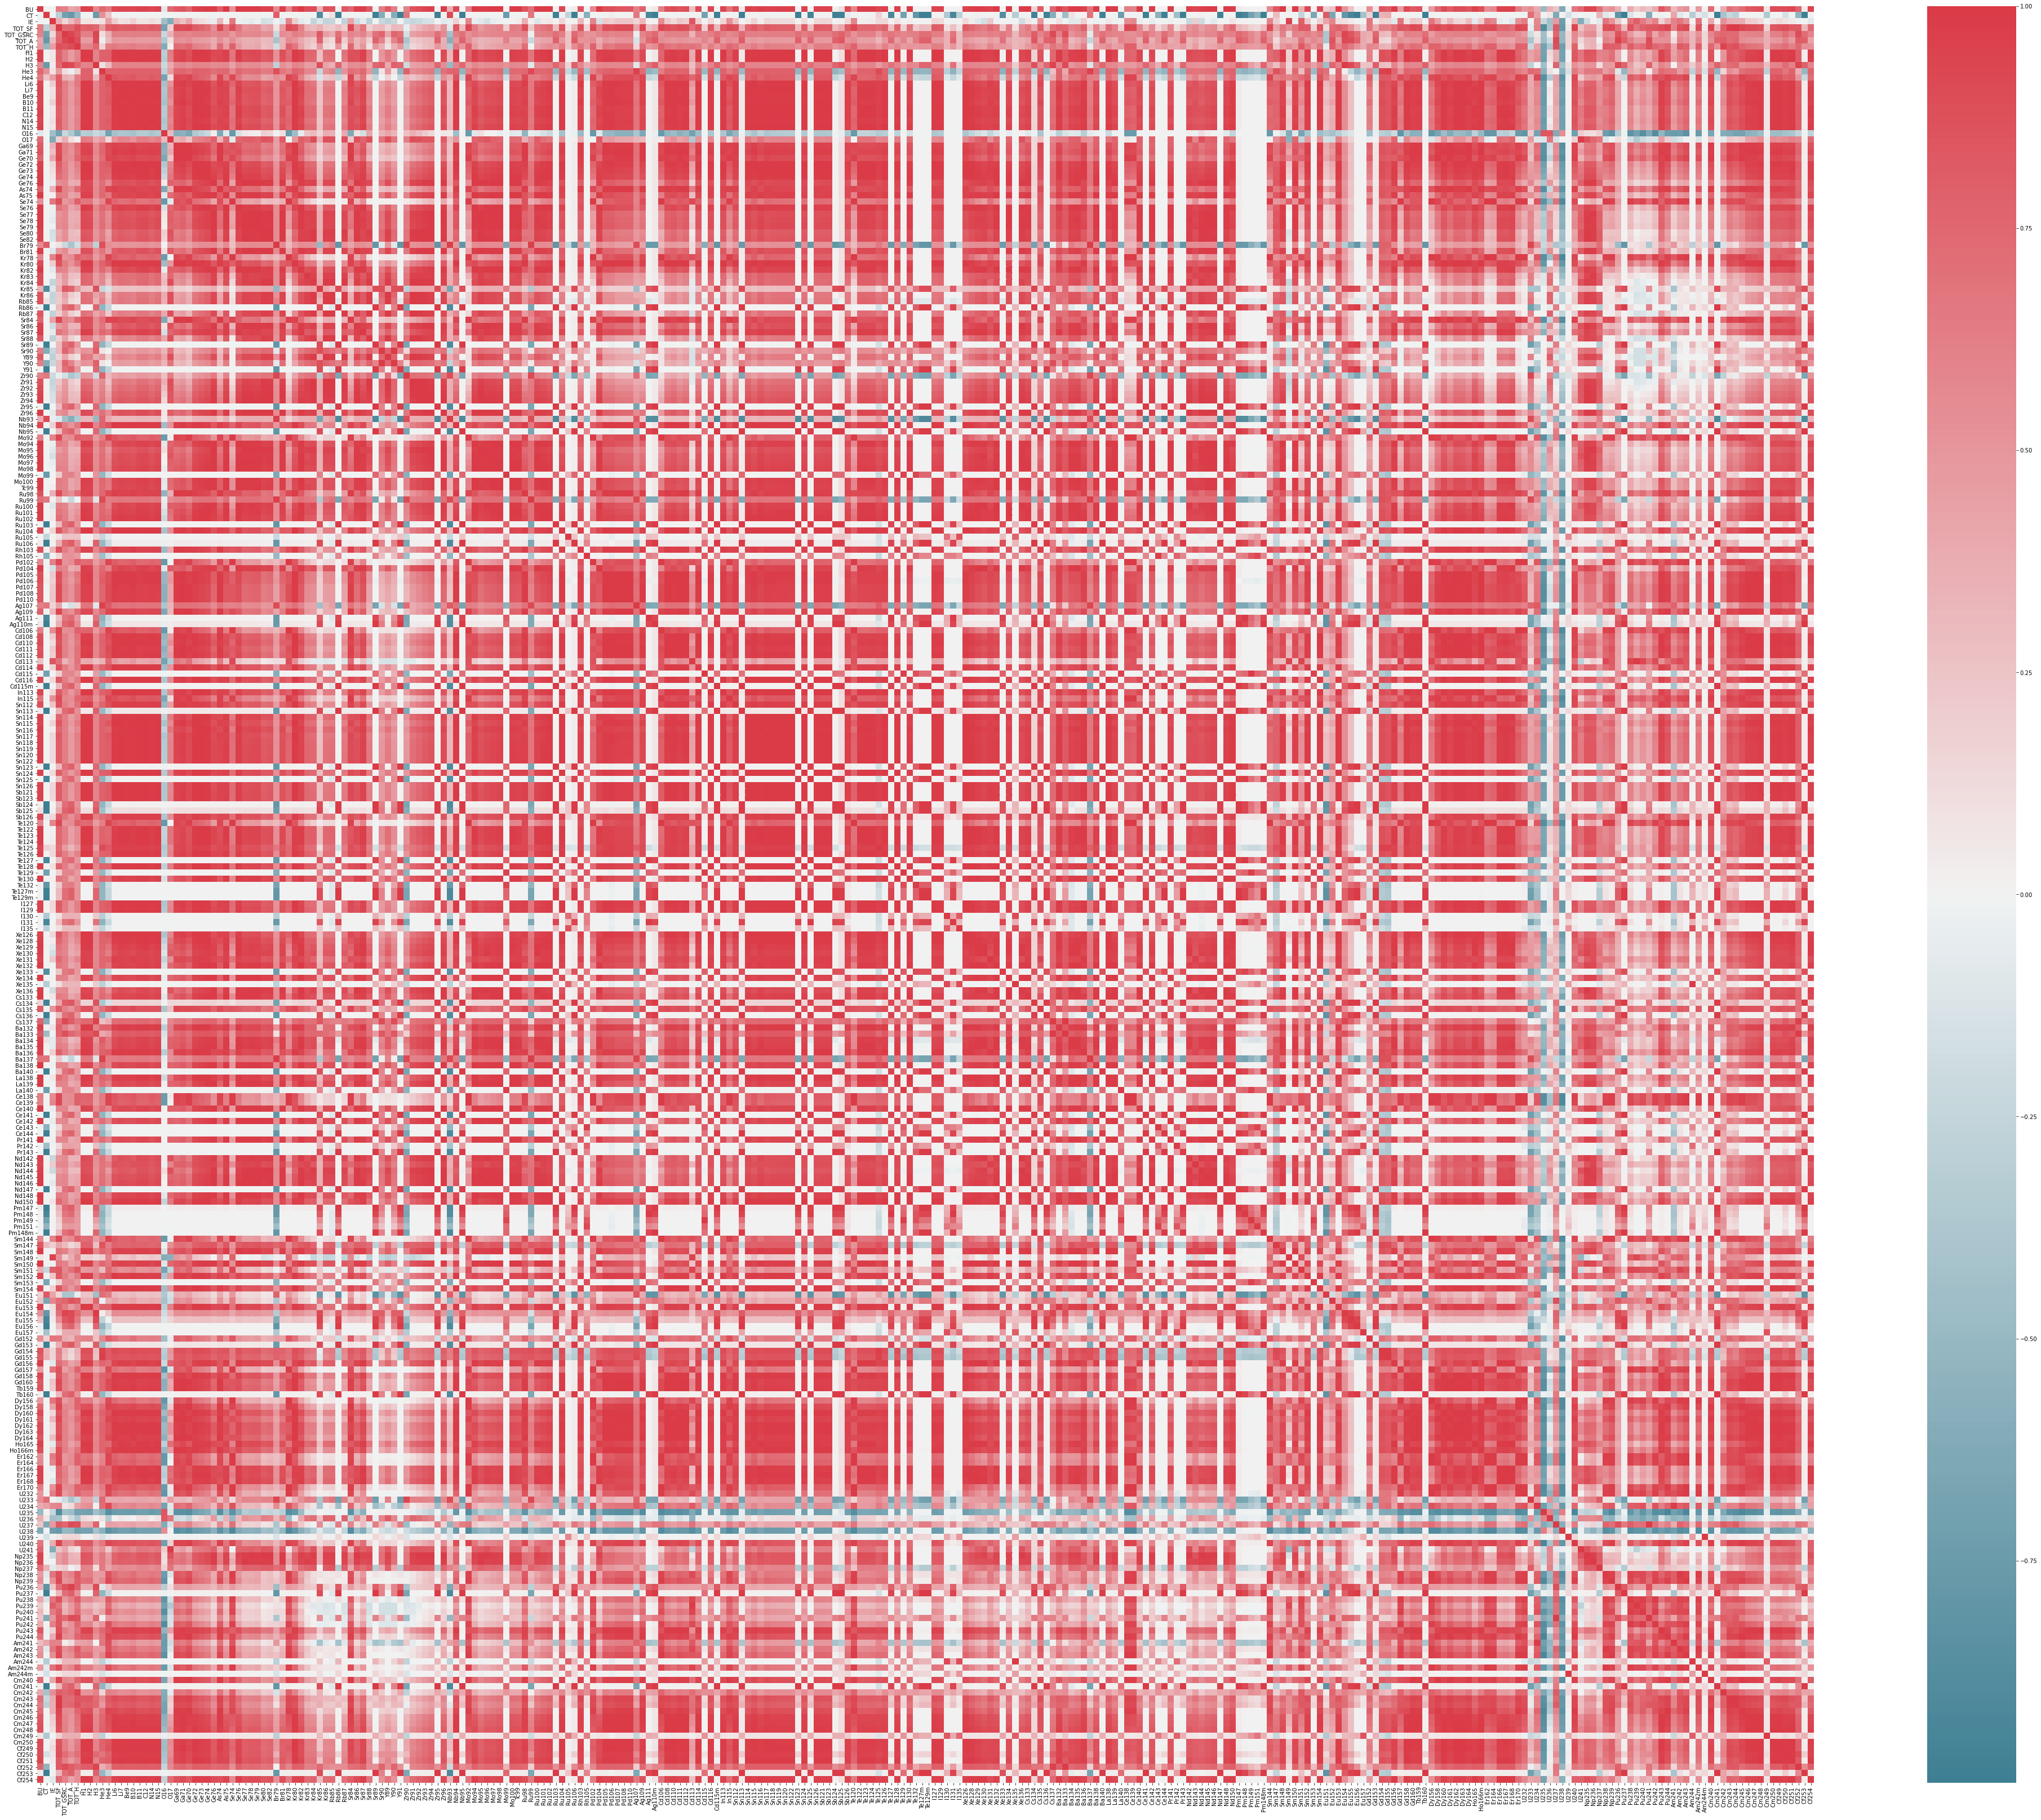

In [8]:
f, ax = plt.subplots(figsize=(72, 58)) 
fig = sns.heatmap(list_corr[0], mask=np.zeros_like(list_corr[0], dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
f.savefig("pearson_preprocessing.png")
f, ax = plt.subplots(figsize=(72, 58)) 
fig = sns.heatmap(list_corr[1], mask=np.zeros_like(list_corr[0], dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
f.savefig("kendall_preprocessing.png")
f, ax = plt.subplots(figsize=(72, 58)) 
fig = sns.heatmap(list_corr[2], mask=np.zeros_like(list_corr[0], dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
f.savefig("spearman_preprocessing.png")

In [ ]:
import joblib
"""pearson_kendall_spearman"""
joblib.dump(list_corr,"list_corr.corr")

In [ ]:
list_corr.corr

In [1]:
import joblib
list_corr = joblib.load("list_corr.corr")

In [ ]:
list_corr

In [ ]:
cor ='spearman'
corr = fueldata.corr(method=cor) 

In [ ]:
print(a)

In [31]:
print(list_corr[0][["BU","CT","IE","fuelType"]])

KeyError: "['fuelType'] not in index"

In [25]:
pd.DataFrame(data=list_corr[0][["BU","CT","IE"]])

,BU,CT,IE
BU,1.000000e+00,-1.225393e-20,-7.105173e-19
CT,-1.225393e-20,1.000000e+00,-2.013406e-17
IE,-7.105173e-19,-2.013406e-17,1.000000e+00
TOT_SF,4.567685e-01,-3.466088e-01,3.608389e-01
TOT_GSRC,1.922421e-02,-1.349207e-01,-5.019329e-03
...,...,...,...
Cf250,3.487069e-01,-1.805321e-01,3.166166e-02
Cf251,4.312966e-01,-4.766956e-03,2.677623e-04
Cf252,1.836217e-01,-1.469610e-01,-4.718333e-02
Cf253,3.391054e-02,-3.101989e-02,-1.216629e-02


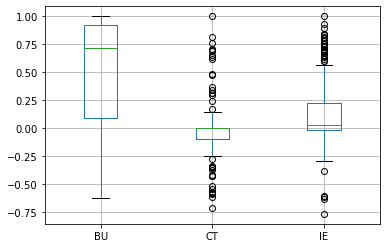

In [26]:
df = pd.DataFrame(data=list_corr[0][["BU","CT","IE"]])

boxplot = df.boxplot(column=["BU","CT","IE"])

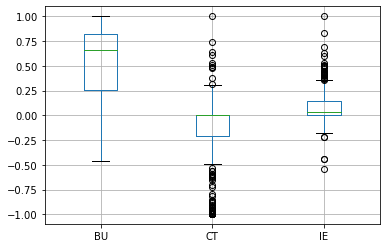

In [27]:
df = pd.DataFrame(data=list_corr[1][["BU","CT","IE"]])

boxplot = df.boxplot(column=["BU","CT","IE"])

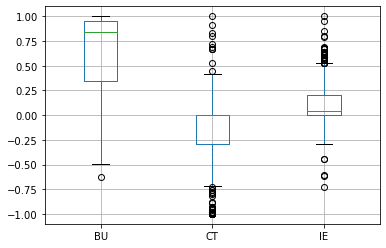

In [28]:
df = pd.DataFrame(data=list_corr[2][["BU","CT","IE","fuelType"]])

boxplot = df.boxplot(column=["BU","CT","IE","fuelType"])

In [ ]:
fueldata.columns

In [54]:
list_corr[2]

s1.corr(s2, method=histogram_intersection)


,BU,CT,IE,fuelType
0,5.0,0.00,1.5,1
1,5.0,91.25,1.5,1
2,5.0,182.50,1.5,1
3,5.0,273.75,1.5,1
4,5.0,365.00,1.5,1
...,...,...,...,...
1321392,70.0,24090.00,10.0,0
1321393,70.0,24455.00,10.0,0
1321394,70.0,24820.00,10.0,0
1321395,70.0,25185.00,10.0,0


In [61]:
print(datetime.now())
cor ='spearman'
corr1= fueldata.corr(method=cor) 
print(datetime.now())

2020-10-22 11:28:13.441917
2020-10-22 11:55:49.395958


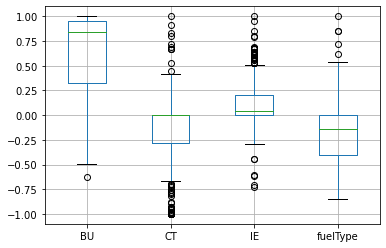

In [65]:
boxplot = corr.boxplot(column=["BU","CT","IE","fuelType"])

In [66]:
print(datetime.now())
cor ='pearson'
corr = fueldata.corr(method=cor) 
print(datetime.now())

2020-10-22 11:59:12.677719
2020-10-22 12:03:04.352003


In [67]:
print(datetime.now())
cor ='kendall'
corr2 = fueldata.corr(method=cor) 
print(datetime.now())

2020-10-22 12:03:04.364141
2020-10-22 14:59:46.168697


In [70]:
print(datetime.now())
cor ='spearman'
corr3 = fueldata.corr(method=cor) 
print(datetime.now())

2020-10-22 15:35:09.974640
2020-10-22 16:01:50.651378


In [71]:
"corr pearson , corr2 kendall, corr3 spearman"

'corr pearson , corr2 kendall, corr3 spearman'

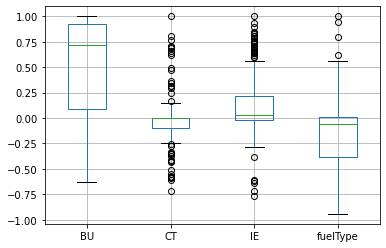

In [72]:
boxplot = corr.boxplot(column=["BU","CT","IE","fuelType"])

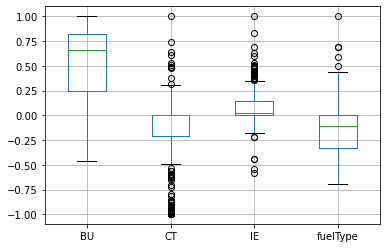

In [73]:
boxplot = corr2.boxplot(column=["BU","CT","IE","fuelType"])

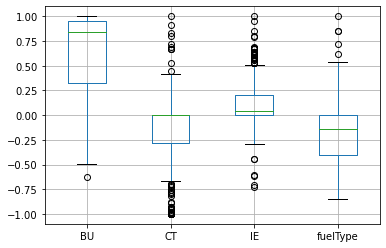

In [74]:
boxplot = corr3.boxplot(column=["BU","CT","IE","fuelType"])

In [55]:
import numpy as np
import pandas as pd
boruta_IE = pd.read_csv("Boruta_IE_excel.csv",sep=";")
boruta_FT = pd.read_csv("Boruta_FT_excel.csv",sep=";")
boruta_BU = pd.read_csv("Boruta_BU_excel.csv",sep=";")
boruta_CT = pd.read_csv("Boruta_CT_excel.csv",sep=";")

In [57]:
boruta_CT.sort_values(by=['meanImp'],ascending=False).iloc[0:20]

,Unnamed: 0,meanImp,medianImp,minImp,maxImp,normHits,decision
51,Ce144,9.73869923239804,9.72164220205729,8.82823165170134,10.8620451602107,1,Confirmed
30,Ru106,9.28714307620664,9.29485582906036,8.32746501594531,10.1344386023992,1,Confirmed
54,Pm147,9.13113376614142,9.17772561343284,8.09214020055098,9.87973640322727,1,Confirmed
34,Ag110m,8.87495383408258,8.89900838003631,7.70660228961393,9.85126038658765,1,Confirmed
39,Sb125,8.65073258498083,8.63172711483562,7.56271358608446,9.93261800273729,1,Confirmed
61,Gd153,8.34945878260399,8.3612381937284,7.3459649252336,9.33534084667111,1,Confirmed
44,Cs134,8.31769459148062,8.32090010817306,7.31021957329729,9.69434258911677,1,Confirmed
59,Eu155,8.10737089171822,8.08496251026204,6.94037665112072,9.15246705974863,1,Confirmed
11,Kr85,7.92960118679699,7.95113034726219,6.71507886755024,8.8486865931382,1,Confirmed
58,Eu154,7.25906903140417,7.17176225436918,6.32196276203577,9.1110122012881,1,Confirmed


In [33]:
boruta_IE.index = boruta_IE["Unnamed: 0"].values
boruta_FT.index = boruta_FT["Unnamed: 0"].values
boruta_BU.index = boruta_BU["Unnamed: 0"].values
boruta_CT.index = boruta_CT["Unnamed: 0"].values
boruta_CT.columns=['Unnamed: 0', "CT_meanImp", 'medianImp', 'minImp', 'maxImp', 'normHits','decision']
boruta_FT.columns=['Unnamed: 0', "FT_meanImp", 'medianImp', 'minImp', 'maxImp', 'normHits','decision']
boruta_BU.columns=['Unnamed: 0', "BU_meanImp", 'medianImp', 'minImp', 'maxImp', 'normHits','decision']
boruta_IE.columns=['Unnamed: 0', "IE_meanImp", 'medianImp', 'minImp', 'maxImp', 'normHits','decision']

In [4]:
boruta_CT.columns=['Isotopo', "meanImp", 'medianImp', 'minImp', 'maxImp', 'normHits','decision']
boruta_FT.columns=['Isotopo', "meanImp", 'medianImp', 'minImp', 'maxImp', 'normHits','decision']
boruta_BU.columns=['Isotopo', "meanImp", 'medianImp', 'minImp', 'maxImp', 'normHits','decision']
boruta_IE.columns=['Isotopo', "meanImp", 'medianImp', 'minImp', 'maxImp', 'normHits','decision']

In [56]:
boruta_CT.replace(to_replace=',', value='.', regex=True,inplace=True)
boruta_BU.replace(to_replace=',', value='.', regex=True,inplace=True)
boruta_FT.replace(to_replace=',', value='.', regex=True,inplace=True)
boruta_IE.replace(to_replace=',', value='.', regex=True,inplace=True)

boruta_CT.astype({"meanImp": float,"medianImp":float}).sort_values(by=['meanImp'],ascending=False).iloc[0:20]
boruta_BU.astype({"meanImp": float,"medianImp":float}).sort_values(by=['meanImp'],ascending=False).iloc[0:20]
boruta_FT.astype({"meanImp": float,"medianImp":float}).sort_values(by=['meanImp'],ascending=False).iloc[0:20]
boruta_IE.astype({"meanImp": float,"medianImp":float}).sort_values(by=['meanImp'],ascending=False).iloc[0:20]

,Unnamed: 0,meanImp,medianImp,minImp,maxImp,normHits,decision
157,U241,11.864391,11.780384,9.0730755291084,14.216562148952,1,Confirmed
119,Sm149,11.796846,11.812274,9.70038263735494,12.9781832889297,1,Confirmed
164,Pu239,11.568676,11.594996,8.97683636307552,13.4462277266573,1,Confirmed
13,O16,11.560027,11.555387,10.3399167027618,12.5963884541895,1,Confirmed
73,Cd113,11.326406,11.370052,9.58660678192125,13.5749361614408,1,Confirmed
14,O17,10.510597,10.451089,8.81643759030343,13.7946532770568,1,Confirmed
165,Pu240,9.659846,9.690217,8.47585099726177,10.7468742343927,1,Confirmed
31,Kr83,9.593816,9.674465,7.38245028049985,10.9927639598032,1,Confirmed
186,Cf254,9.585655,9.589988,6.50638372423268,10.9659745944535,1,Confirmed
154,U238,9.553461,9.627844,7.70004458921531,11.537001302373,1,Confirmed


In [14]:
result=boruta_IE.astype({"meanImp": float}).sort_values(by=['meanImp'],ascending=False).iloc[0:20]
result.replace(to_replace=',', value='.', regex=True,inplace=True)
cambio = ['**Kr85', '**Pu241', '**U238', '**Eu152', '**U233', '**U237', '**Eu151', '**TOT_GSRC','**Ba138', '**U236']
otra = ['Kr85', 'Pu241', 'U238', 'Eu152', 'U233', 'U237', 'Eu151', 'TOT_GSRC','Ba138', 'U236']
for i in range(0,len(cambio)):
    result.replace(to_replace=otra[i], value=cambio[i], regex=True,inplace=True)
#result.plot(kind='box',x='Isotopo',y='meanImp,minImp,maxImp')
result.to_csv("boruta_20_importantes_IE_solo.csv",index=False)

In [34]:
result= pd.concat([boruta_CT[["CT_meanImp"]],boruta_FT[["FT_meanImp"]],boruta_IE[["IE_meanImp"]],boruta_BU[["BU_meanImp"]]], axis=1)

In [35]:
result.replace(np.nan,0,inplace=True)

In [36]:
result.replace(to_replace=',', value='.', regex=True,inplace=True)

In [37]:
result=result.astype({"CT_meanImp": float, "FT_meanImp":float,"IE_meanImp":float,"BU_meanImp": float})

In [38]:
result["promedio"]=(result["CT_meanImp"]+result["FT_meanImp"]+result["IE_meanImp"]+result["BU_meanImp"]) /4

In [8]:
boruta_IE

,Isotopo,meanImp,medianImp,minImp,maxImp,normHits,decision
0,U241,11.86439093,11.78038366,9.073075529,14.21656215,1,Confirmed
1,Sm149,11.79684618,11.81227435,9.700382637,12.97818329,1,Confirmed
2,Pu239,11.5686764,11.59499612,8.976836363,13.44622773,1,Confirmed
3,O16,11.56002693,11.55538659,10.3399167,12.59638845,1,Confirmed
4,Cd113,11.32640585,11.37005194,9.586606782,13.57493616,1,Confirmed
...,...,...,...,...,...,...,...
182,Cm242,3.121905437,3.067890614,2.045163726,4.752274131,0.808080808,Confirmed
183,Ba136,3.071873907,3.033904233,1.884187684,5.777020183,0.686868687,Confirmed
184,TOT_SF,3.051188243,3.072970589,1.556823618,4.361077207,0.717171717,Confirmed
185,H1,3.027039016,2.994676745,1.393983312,4.587594279,0.717171717,Confirmed


{'whiskers': [<matplotlib.lines.Line2D at 0x189745d3388>,
 'caps': [<matplotlib.lines.Line2D at 0x189765fe9c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x189740222c8>],
 'medians': [<matplotlib.lines.Line2D at 0x189765fee48>],
 'fliers': [<matplotlib.lines.Line2D at 0x189765fef08>],
 'means': []}

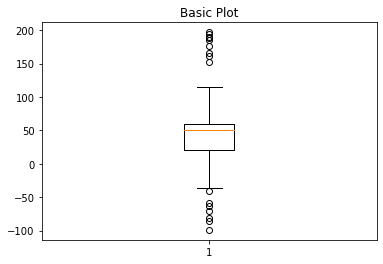

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)

In [39]:
result["std"]=result[["CT_meanImp","FT_meanImp","IE_meanImp","BU_meanImp"]].std(axis = 1, skipna = True) 

In [43]:
result.sort_values(by=['promedio',"std"],ascending=False).loc[(result.CT_meanImp>=1)& (result.FT_meanImp>=1)& (result.IE_meanImp>=1)& (result.BU_meanImp>=1)]#.index#.iloc[0:20].to_excel("boruta_20_importantes.xlsx")

,CT_meanImp,FT_meanImp,IE_meanImp,BU_meanImp,promedio,std
Kr85,7.929601,7.929601,3.492120,5.704899,6.264055,2.124803
Pu241,6.521247,6.521247,3.653074,5.190785,5.471588,1.364968
U238,4.245424,4.245424,9.553461,3.654733,5.424761,2.766516
Eu152,5.323905,5.323905,5.248570,4.275484,5.042966,0.512885
U233,5.961970,5.961970,4.545507,3.413760,4.970802,1.234245
U237,6.302069,6.302069,2.996321,4.082244,4.920676,1.655557
Eu151,5.808640,5.808640,3.374434,3.385805,4.594380,1.402115
TOT_GSRC,4.804370,4.804370,3.848032,4.242705,4.424869,0.466893
Ba138,3.293792,3.293792,5.023717,5.599560,4.302716,1.188487
U236,3.882728,3.882728,6.098701,3.084566,4.237181,1.296798


In [164]:
import joblib
"""pearson_kendall_spearman"""
joblib.dump(corr,"list_corr_kendall.corr")
joblib.dump(corr2,"list_corr_pearson.corr")
joblib.dump(corr3,"list_corr_spearman.corr")

['list_corr_spearman.corr']

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt# Load Iris dataset
iris = datasets.load_iris()# Preparing Iris dataset
iris_data = pd.DataFrame(data=iris.data,
columns=['sepal_length', 'sepal_width',
         'petal_length', 'petal_width'])

iris_target = pd.DataFrame(data=iris.target, columns=['species'])

iris_df = pd.concat([iris_data, iris_target], axis=1)# Add species name
iris_df['species_name'] = np.where(iris_df['species'] == 0,
    'Setosa', None)

iris_df['species_name'] = np.where(iris_df['species'] == 1, 'Versicolor', iris_df['species_name'])
iris_df['species_name'] = np.where(iris_df['species'] == 2, 'Virginica', iris_df['species_name'])
# Prepare petal length by species datasets
setosa_petal_length = iris_df[iris_df['species_name'] == 'Setosa']['petal_length']
versicolor_petal_length = iris_df[iris_df['species_name'] == 'Versicolor']['petal_length']
virginica_petal_length = iris_df[iris_df['species_name'] == 'Virginica']['petal_length']

# Visualize petal length distribution for all speciesfig, ax = plt.subplots(figsize=(12, 7))# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)# Set plot title
ax.set_title('Distribution of petal length by species')# Set species names as labels for the boxplot
dataset = [setosa_petal_length, versicolor_petal_length, virginica_petal_length]
labels = iris_df['species_name'].unique()
ax.boxplot(dataset, labels=labels)
plt.show()

Image for post